In [1]:
from spectral import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import math

pi= math.pi

In [2]:
img = open_image('92AV3C.lan')

In [3]:
print(img)

	Data Source:   '././92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16


In [4]:
img.shape

(145, 145, 220)

In [5]:
arr = img.load()

/home/poc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [6]:
arr.__class__

spectral.spectral.ImageArray

In [7]:
arr.shape

(145, 145, 220)

In [8]:
arr = np.asarray(arr, dtype=np.int16)


In [9]:
arr

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [10]:
arr.shape

(145, 145, 220)

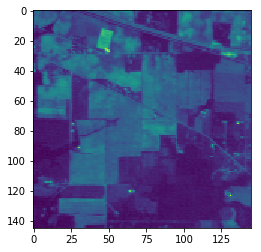

In [11]:
plt.imshow(arr[:,:,10])

In [12]:
import os
import pickle
import math
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from bayes_opt import BayesianOptimization

# Keras modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv3D, MaxPooling2D,Conv2D, Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

/home/poc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
    model = Sequential()

    # Add a convolutional layer
    model.add(Conv2D(filters=128, kernel_size=5, strides=(1,1), input_shape=(145,145,220)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

    # Add a convolution layer
    model.add(Conv2D(filters=64, kernel_size=5, strides=(2,2)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 141, 141, 128)     704128    
_________________________________________________________________
activation_1 (Activation)    (None, 141, 141, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        204864    
_________________________________________________________________
activation_2 (Activation)    (None, 69, 69, 64)        0         
Total params: 908,992
Trainable params: 908,992
Non-trainable params: 0
_________________________________________________________________


In [14]:
optAdam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(optimizer=optAdam,loss='mean_squared_error', metrics=['accuracy'])


In [15]:
X= np.zeros((1,145,145,220), np.int16)
for i in range(1):
    X[i]=arr[:,:,:].reshape(145,145,220)


In [16]:
#X.astype(np.int16)
print(X.shape)
print(X.dtype.name)

(1, 145, 145, 220)
int16


In [17]:
output1=model.predict(X)

In [18]:
output1.shape

(1, 69, 69, 64)

### Inverse CNN before DCT and IDCT

In [19]:
    model = Sequential()

# Add a convolutional layer
    model.add(Conv2DTranspose(filters=128, kernel_size=5, strides=(2,2), input_shape=(69,69,64)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

    # Add a convolution layer
    model.add(Conv2DTranspose(filters=220, kernel_size=5, strides=(1,1)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    
    model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_1 (Conv2DTr (None, 141, 141, 128)     204928    
_________________________________________________________________
activation_3 (Activation)    (None, 141, 141, 128)     0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 145, 145, 220)     704220    
_________________________________________________________________
activation_4 (Activation)    (None, 145, 145, 220)     0         
Total params: 909,148
Trainable params: 909,148
Non-trainable params: 0
_________________________________________________________________


In [20]:
O1= model.predict(output1)

In [21]:
O1.shape

(1, 145, 145, 220)

### MSE without DCT and IDCT

In [22]:
sum_err=0
from sklearn.metrics import mean_squared_error
for i in range(0,220):
    mse = mean_squared_error(arr[:,:,i], O1[0,:,:,i])
    er=np.sqrt(mse)
    sum_err=sum_err+er
sum_err


529384.0648193359

### PSNR without DCT and IDCT

In [23]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 65535.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(arr,O1[0])
print(d)

27.189081452887596


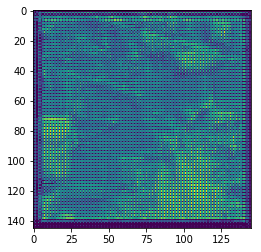

In [42]:
plt.imshow(O1[0,:,:,10])

DCT=np.zeros(shape=(64,67,67)).astype('int16')

### DCT

In [43]:
for m in range(64):
    height,width=output1[0,:,:,m].shape
    coef=np.zeros(shape=(8,8)).astype('int16')
    a=0
    while a<=height:
        b=0
        while b<=width:
            xyz=output1[0,a:a+8,b:b+8,m]
            #print(xyz.shape)
            dct=np.zeros(shape=(8,8)).astype('int16')
            h,w=xyz.shape
            for i in range(0,h):
                for j in range(0,w):
                    if i==0:
                        ci= 1/math.sqrt(h)
                    else:
                        ci=math.sqrt(2)/math.sqrt(h)
                    if j==0:
                        cj=1/math.sqrt(width)
                    else:
                        cj=math.sqrt(2)/math.sqrt(w)
                        
                    sum=0
                    for k in range(0,h):
                        for l in range(0,w):
                            dict1=xyz[k,l]*math.cos((2*k+1)*i*math.pi/(2*h))*math.cos((2*l+1)*j*math.pi/(2*w))
                            
                            sum=sum+dict1
                    dct[i,j]=ci*cj*sum
                    DCT[m,:,:]+=dct[i,j]  
            b=b+8
        a=a+8
        

### Type conversion from float64 to int16

In [44]:
print(DCT.dtype.name)
DCT=DCT.astype(np.uint16)
print(DCT.dtype.name)
print(DCT.shape)
DCT

int16
uint16
(64, 67, 67)


array([[[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[51715, 51715, 51715, ..., 51715, 51715, 51715],
        [51715, 51715, 51715, ..., 51715, 51715, 51715],
        [51715, 51715, 51715, ..., 51715, 51715, 51715],
        ...,
        [51715, 51715, 51715, ..., 51715, 51715, 51715],
        [51715, 51715, 51715, ..., 51715, 517

### inverse DCT

In [45]:
from numpy.linalg import inv
    
B=np.linalg.inv(DCT)


    

LinAlgError: Singular matrix

In [335]:
DCT.shape

(64, 67, 67)

In [336]:
b.shape

(67, 67, 64)

In [337]:
B=np.zeros(shape=(1,67,67,64)).astype('uint16')
B[0,:,:,:]=b[:,:,:].reshape(67,67,64)
B[0]

array([[[    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        ...,
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0]],

       [[    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        ...,
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0]],

       [[    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  2187,     0],
        ...,
        [    0,     0, 51362, ...,     0,  2187,     0],
        [    0,     0, 51362, ...,     0,  21

### Inverse CNN

In [338]:
    model = Sequential()

# Add a convolutional layer
    model.add(Conv2DTranspose(filters=128, kernel_size=7, strides=(2,2), input_shape=(67,67,64)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

    # Add a convolution layer
    model.add(Conv2DTranspose(filters=220, kernel_size=7, strides=(1,1)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_25 (Conv2DT (None, 139, 139, 128)     401536    
_________________________________________________________________
activation_40 (Activation)   (None, 139, 139, 128)     0         
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 145, 145, 220)     1380060   
_________________________________________________________________
activation_41 (Activation)   (None, 145, 145, 220)     0         
Total params: 1,781,596
Trainable params: 1,781,596
Non-trainable params: 0
_________________________________________________________________


In [339]:
o2=model.predict(B)
o2=o2.astype(np.uint16)

In [340]:
print(o2.shape)
print(o2[0].shape)
print(o2.dtype.name)


(1, 145, 145, 220)
(145, 145, 220)
uint16


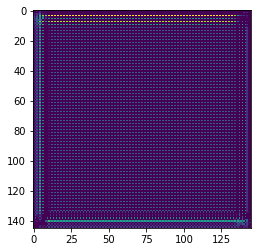

In [341]:
plt.imshow(o2[0,:,:,10])


### MSE calculation

In [342]:
sum_err=0
from sklearn.metrics import mean_squared_error
for i in range(0,220):
    mse = mean_squared_error(arr[:,:,i], o2[0,:,:,i])
    er=np.sqrt(mse)
    sum_err=sum_err+er
sum_err


887612.020464312

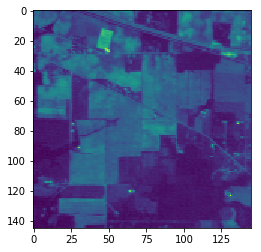

In [343]:
plt.imshow(arr[:,:,10])

### PSNR calculation 

In [344]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 65535.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(arr,o2[0])
print(d)

23.10692949207837
